# Classification of News Articles 

It is a notebook for multiclass classification of News articles which are having classes numbered 1 to 4, 

where 1 is "World News",

2 is "Sports News", 

3 is "Business News" and

4 is "Science-Technology News".

Every news website classifies the news article before publishing it so that every time visitors visit their website can easily click on the type of news that interests them. For example, I like to read the latest technology updates, so every time I visit a news website, I click on the technology section. But you may or may not like to read about technology, you may be interested in politics, business, entertainment, or maybe sports.

Currently, the news articles are classified by hand by the content managers of news websites. But to save time, they can also implement a machine learning model on their websites that read the news headline or the content of the news and classifies the category of the news. In the section below, I will take you through how you can train a machine learning model for the task of news classification using the Python programming language.

### Importing libraries

In [1]:
import numpy as np 
import pandas as pd 
import nltk
import string as s
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/ag-news-classification-dataset/train.csv
/kaggle/input/ag-news-classification-dataset/test.csv


In [2]:
train_data = pd.read_csv('/kaggle/input/ag-news-classification-dataset/train.csv')
test_data = pd.read_csv('/kaggle/input/ag-news-classification-dataset/test.csv')

In [3]:
train_data.head()

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [4]:
test_data.head()

,Class Index,Title,Description
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o..."
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 3 columns):
Class Index    120000 non-null int64
Title          120000 non-null object
Description    120000 non-null object
dtypes: int64(1), object(2)
memory usage: 2.7+ MB


In [6]:
print("train ==>",train_data.shape)
print("test ==>",test_data.shape)

train ==> (120000, 3)
test ==> (7600, 3)


### CountPlot 

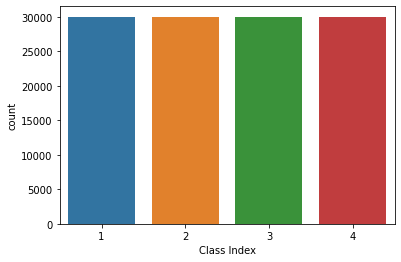

In [7]:
#countplot traing data
sns.countplot(train_data['Class Index']);

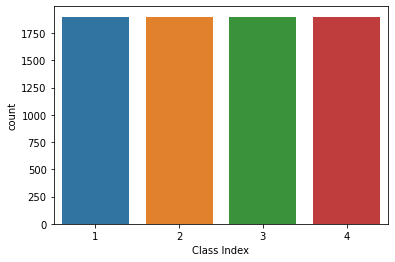

In [8]:
# countplot test data
sns.countplot(test_data['Class Index'])

### spliting data into input and label

In [9]:
train_x = train_data.Description
test_x = test_data.Description

train_y =  train_data['Class Index']
test_y = test_data['Class Index']

### Preprocessing of data
#### the data is preprocessed in NLP it is also known as text normalization. some of the most common methods of text normalization are

#### Tokenization
#### lemmatization
#### stemming

In [10]:
training_x = train_data.Description
testing_x = test_data.Description

training_y =  train_data['Class Index']
testing_y = test_data['Class Index']

### Removal of HTML Tag

In [11]:
def striphtml(data):
    p = re.compile(r'<.*?>')
    return p.sub('', data)

In [12]:
train_x = train_x.apply(striphtml)
train_x

0         Reuters - Short-sellers, Wall Street's dwindli...
1         Reuters - Private investment firm Carlyle Grou...
2         Reuters - Soaring crude prices plus worries\ab...
3         Reuters - Authorities have halted oil export\f...
4         AFP - Tearaway world oil prices, toppling reco...
                                ...                        
119995     KARACHI (Reuters) - Pakistani President Perve...
119996    Red Sox general manager Theo Epstein acknowled...
119997    The Miami Dolphins will put their courtship of...
119998    PITTSBURGH at NY GIANTS Time: 1:30 p.m. Line: ...
119999    INDIANAPOLIS -- All-Star Vince Carter was trad...
Name: Description, Length: 120000, dtype: object

In [13]:
test_x = test_x.apply(striphtml)

### Removal of URL

In [14]:
def remove_url(data):
    return  re.sub(r'\s*(?:https?://)?www\.\S*\.[A-Za-z]{2,5}\s*', ' ', data).strip()

In [15]:
train_x = train_x.apply(remove_url)
train_x

0         Reuters - Short-sellers, Wall Street's dwindli...
1         Reuters - Private investment firm Carlyle Grou...
2         Reuters - Soaring crude prices plus worries\ab...
3         Reuters - Authorities have halted oil export\f...
4         AFP - Tearaway world oil prices, toppling reco...
                                ...                        
119995    KARACHI (Reuters) - Pakistani President Pervez...
119996    Red Sox general manager Theo Epstein acknowled...
119997    The Miami Dolphins will put their courtship of...
119998    PITTSBURGH at NY GIANTS Time: 1:30 p.m. Line: ...
119999    INDIANAPOLIS -- All-Star Vince Carter was trad...
Name: Description, Length: 120000, dtype: object

### Tokenization of Data

In [16]:
# from nltk.tokenize import word_tokenize

def word_tok(data):
    tokens = re.findall("[\w']+", data)
#     print(tokens)
    return tokens


In [17]:
train_x = train_x.apply(word_tok)

In [18]:
test_x =test_x.apply(word_tok)

### removal of stopwords

In [19]:
def remove_stopwords(data):
    stopWords = stopwords.words('english')
    new_list = []
    for i in data:
        if i.lower() not in stopWords:
            new_list.append(i)
#     print(new_list)
    return new_list

In [20]:
train_x = train_x.apply(remove_stopwords)
test_x = test_x.apply(remove_stopwords)

### Removal of Punctuation Symbols

In [21]:
def remove_punctuations(data):
    new_list = []
    for i in data:
        for j in s.punctuation:
            i = i.replace(j,'')
        new_list.append(i)
    return new_list

In [22]:
train_x = train_x.apply(remove_punctuations)
test_x = test_x.apply(remove_punctuations)

### removal of numbers

In [23]:
def remove_number(data):
    no_digit_list = []
    new_list = []
    
    for i in data:
        for j in s.digits:
            i = i.replace(j,'')
        no_digit_list.append(i)
    
    for i in no_digit_list:
        if i!='':
            new_list.append(i)
    return new_list



In [24]:
train_x = train_x.apply(remove_number)
test_x = test_x.apply(remove_number)

### Stemming of dataset

In [25]:
import nltk

def stemming(data):
    porter_stemmer = nltk.PorterStemmer()
    roots = [porter_stemmer.stem(i) for i in data]
    return roots

In [26]:
train_x = train_x.apply(stemming)
test_x = test_x.apply(stemming)

### Lemmatization of data


In [27]:
def lemmatization(data):
    lemmatizer = nltk.stem.WordNetLemmatizer()
    roots = [lemmatizer.lemmatize(i) for i in data]
    return roots

In [28]:
train_x = train_x.apply(lemmatization)
test_x = test_x.apply(lemmatization)

### remove extra words

In [29]:
def remove_extraWords(data):
    extra_words =['href','iii','lt','gt','ii','com','quot']
    
    new_list = []
    for i in data:
        if i not in extra_words:
            new_list.append(i)
    return new_list

In [30]:
train_x = train_x.apply(remove_extraWords)
test_x = test_x.apply(remove_extraWords)

In [31]:
train_x = [" ".join(map(str, lst)) for lst in train_x]
test_x = [" ".join(map(str, lst)) for lst in test_x]

### Feature Extraction

In [32]:
"""Feature are extracted from the datset and TF-IDF (term frequency - Inverse Documents Frequence ) 
is used for this purpose"""


'Feature are extracted from the datset and TF-IDF (term frequency - Inverse Documents Frequence ) \nis used for this purpose'

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

TfIdf = TfidfVectorizer(min_df=8,ngram_range=(1,3))
train_1 = TfIdf.fit_transform(train_x)
test_1 = TfIdf.transform(test_x)

print("no of features extracted")
print(len(TfIdf.get_feature_names()))
print(TfIdf.get_feature_names()[:100])

no of features extracted
60078
['aa', 'aa billion', 'aa footbal', 'aa target', 'aa target stock', 'aaa', 'aapl', 'aapl qtype', 'aapl qtype sym', 'aaron', 'aaron peirsol', 'aaron rodger', 'ab', 'ababa', 'abandon', 'abandon microsoft', 'abandon microsoft window', 'abandon nuclear', 'abandon plan', 'abat', 'abba', 'abba said', 'abbey', 'abbey nation', 'abbey nation plc', 'abbi', 'abbi wambach', 'abbott', 'abbott laboratori', 'abc', 'abc monday', 'abc monday night', 'abc new', 'abdic', 'abduct', 'abduct gunpoint', 'abduct iraq', 'abduct three', 'abduct two', 'abductor', 'abdul', 'abdul kalam', 'abdullah', 'abdullah ahmad', 'abdullah ahmad badawi', 'abdullah ii', 'aberdeen', 'abid', 'abidjan', 'abidjan ivori', 'abidjan ivori coast', 'abidjan reuter', 'abil', 'abil run', 'abimael', 'abimael guzman', 'abkhazia', 'abl', 'abl buy', 'abl get', 'abl make', 'abl play', 'abl take', 'abl use', 'ablaz', 'abn', 'abn amro', 'aboard', 'aboard intern', 'aboard intern space', 'abolish', 'aborigin', 'abort

In [34]:
train_array = train_1.toarray()
test_array = test_1.toarray()

In [35]:
train_array.shape

(120000, 60078)

In [36]:
test_array.shape

(7600, 60078)

In [37]:
pd.DataFrame(train_array[:100] , columns=TfIdf.get_feature_names())

,aa,aa billion,aa footbal,aa target,aa target stock,aaa,aapl,aapl qtype,aapl qtype sym,aaron,...,zone,zoo,zook,zook fire,zoom,zurich,zurich challeng,zurich reuter,zurich switzerland,zvonareva
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Training of Model

In [38]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from lightgbm import LGBMClassifier

In [39]:
def models(model_name,model):
    print("Model ==> ",model_name )
    print()
    print()
    
    model.fit(train_array,train_y)
    pred = model.predict(test_array)
    
    print("first 20 actual labels")
    print(test_y.tolist()[:20])
    print("first 20 predicted labels")
    print(pred.tolist()[:20])
    
    print()
    print()
    
    print('======================// Evaluation of Results //===========================')
    print()
    print("F1 score of the model ==> ",f1_score(test_y,pred,average ='micro' ))
    print('Accuracy of the model ==> ',round(accuracy_score(test_y,pred)*100,3),"%")
    
    print()
    print()
    
    print('======================// Confusion matrix //===========================')
    print()

    from sklearn.metrics import  confusion_matrix
    sns.set(font_scale=1.5)
    cof=confusion_matrix(test_y, pred)
    cof=pd.DataFrame(cof, index=[i for i in range(1,5)], columns=[i for i in range(1,5)])
    plt.figure(figsize=(8,8))

    sns.heatmap(cof, cmap="PuRd",linewidths=1, annot=True,square=True,cbar=False,fmt='d',xticklabels=['World','Sports','Business','Science'],yticklabels=['World','Sports','Business','Science'])
    plt.xlabel("Predicted Class");
    plt.ylabel("Actual Class");

    plt.title("Confusion Matrix for News Article Classification");

Model ==>  MultinomialNB


first 20 actual labels
[3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
first 20 predicted labels
[3, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3]


======================// Evaluation of Results //===========================

F1 score of the model ==>  0.895921052631579
Accuracy of the model ==>  89.592 %


======================// Confusion matrix //===========================



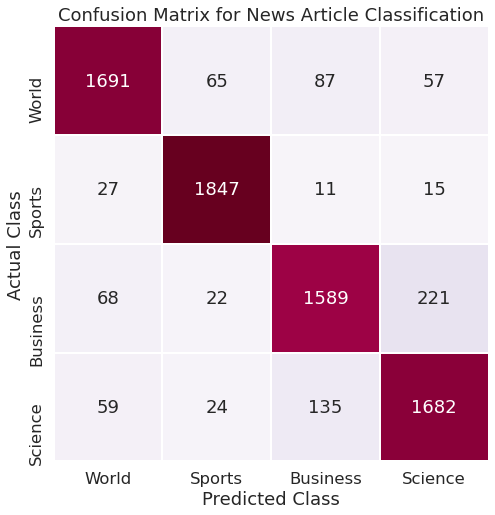

In [40]:
NB_MN = MultinomialNB(alpha=0.52)
name = "MultinomialNB"
models(name, NB_MN)

In [41]:
# SGD=SGDClassifier()
# name= "SGDClassifier"
# models(name,SGD)

In [42]:
# lgbm=LGBMClassifier()
# name= "LGBMClassifier"
# models(name,lgbm)

## Other method

One definition of an ML pipeline is a means of automating the machine learning workflow by enabling data to be transformed and correlated into a model that can then be analyzed to achieve outputs. This type of ML pipeline makes the process of inputting data into the ML model fully automated.

In [43]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

def news_models():
    new_model = Pipeline([
            ('vect' , TfidfVectorizer()),
            ('tfidf',TfidfTransformer()),
            ('SGD',SGDClassifier())])
    return new_model

model = news_models()
model.fit(train_x,train_y)

Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(...
                 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
           

In [44]:
pred = model.predict(test_x)
print("first 20 actual labels")
print(test_y.tolist()[:20])
print("first 20 predicted labels")
print(pred.tolist()[:20])

first 20 actual labels
[3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
first 20 predicted labels
[3, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3]


In [45]:
print('======================// Evaluation of Results //===========================')
print()
print("F1 score of the model ==> ",f1_score(test_y,pred,average ='micro' ))
print('Accuracy of the model ==> ',round(accuracy_score(test_y,pred)*100,3),"%")

======================// Evaluation of Results //===========================

F1 score of the model ==>  0.9036842105263158
Accuracy of the model ==>  90.368 %


## Save to pickled file using joblib

In [46]:
import joblib

# Save the model as a pickle in a file
joblib.dump(model, 'news_article_model.pkl')
# Load the model from the file
news_model = joblib.load('news_article_model.pkl')

In [47]:
news_model.predict(test_x)

array([3, 4, 4, ..., 2, 3, 3])

## New User data

### Take Data from User

In [48]:
def striphtml(data):
    p = re.compile(r'<.*?>')
    return p.sub('', data)

def remove_url(data):
    return  re.sub(r'\s*(?:https?://)?www\.\S*\.[A-Za-z]{2,5}\s*', ' ', data).strip()

def lower_case(data):
    return data.lower()

def word_tok(data):
    tokens = re.findall("[\w']+", data)
#     print(tokens)
    return tokens

def remove_stopwords(data):
    stopWords = stopwords.words('english')
    new_list = []
    for i in data:
        if i.lower() not in stopWords:
            new_list.append(i)
#     print(new_list)
    return new_list

def remove_punctuations(data):
    new_list = []
    for i in data:
        for j in s.punctuation:
            i = i.replace(j,'')
        new_list.append(i)
    return new_list

def remove_number(data):
    no_digit_list = []
    new_list = []
    
    for i in data:
        for j in s.digits:
            i = i.replace(j,'')
        no_digit_list.append(i)
    
    for i in no_digit_list:
        if i!='':
            new_list.append(i)
    return new_list

def stemming(data):
    porter_stemmer = nltk.PorterStemmer()
    roots = [porter_stemmer.stem(i) for i in data]
    return roots

def lemmatization(data):
    lemmatizer = nltk.stem.WordNetLemmatizer()
    roots = [lemmatizer.lemmatize(i) for i in data]
    return roots

def remove_extraWords(data):
    extra_words =['href','iii','lt','gt','ii','com','quot']
    
    new_list = []
    for i in data:
        if i not in extra_words:
            new_list.append(i)
    return new_list

In [49]:
# userInput = input("Enter text: ")

userInput = 'The first five cases were flagged in Scotland on March 31 by "astute clinicians, realising they were seeing something unusual", said Meera Chand, director of clinical and emerging infections at the UK Health Security Agency. The children did not have any of the five known hepatitis viruses, A, B, C, D and E, Chand said. Such cases are very rare as the Scottish doctors would normally see four to five unknown hepatitis cases in a year, news agency AFP reported quoting the doctor.'

In [50]:
userInput = striphtml(userInput)
userInput = remove_url(userInput)
userInput = lower_case(userInput)
userInput = word_tok(userInput)
userInput = remove_stopwords(userInput)
userInput = remove_punctuations(userInput)
userInput = remove_number(userInput)
userInput = stemming(userInput)
userInput = lemmatization(userInput)
userInput = remove_extraWords(userInput)
userInput = [" ".join(map(str, userInput))]

In [51]:
result = news_model.predict(userInput)
if result[0] == 1:
    print("World News")
elif result[0] == 2:
    print('Sports News')
elif result[0] == 3:
    print('Business News')
elif result[0] == 4:
    print('Science-Technology News')

World News
